# Algoritmo de ordenamiento por conteo

El algoritmo de ordenamiento por conteo no funciona comparando los elementos, en su lugar lo que hace es contar la cantidad de veces que aparece cada valor y posteriormente reproduce la lista ordenada.

## Complejidad del algoritmo
La complejidad computacional del algoritmo es O(n), pues requiere recorrer un maximo de 3 veces el rango de valores presente en la lista.

## Restricciones
- Funciona exclusivamente con valores enteros.
- Requiere la cantidad de memoria equivalente al rango de valores que hay en la lista.
- Podría implementarse para valores diferentes a enteros si se cuenta con una funcion biyectiva que convierta un elemento a un entero y que permita re-convertir el entero en el valor original.

## ¿Cómo funciona?
El algoritmo consta de los siguientes pasos
- Recorre la lista para identificar el valor mínimo y el valor máximo que contiene.
- Reserva el espacio suficiente para almacenar el rango [valor mínimo , valor máximo] inicializandolo en ceros.
- Recorre la lista para acumular el numero de ocurrencias de cada valor.
- Recorre el espacio de conteo generando la lista ordenada insertando tantas veces como se contó cada valor.


## Implementación
A continuación se presenta el código del algoritmo

In [39]:
def Orden_por_conteo ( lista ):
    if not lista:
        # La lista esta vacia!
        # se retorna la misma que ingresó
        return lista
    # Identificar el maximo y el minimo de la lista
    opc_minimo = opc_maximo = lista[0]
    for item in lista:
        if item < opc_minimo:
            opc_minimo = item
        if item > opc_maximo:
            opc_maximo = item
    # Preparo la lista para almacenar el conteo
    # reservando suficiente espacio para todos los elementos posibles    
    conteo = [0 for _ in range (opc_maximo - opc_minimo + 1)]
    # Recorrer la lista y hacer el conteo
    for item in lista:
        conteo [ item - opc_minimo ] += 1
    # Crear la lista de respuesta
    lista_ordenada = []
    for ind, item in enumerate(conteo):
        if item > 0:
            # Se ingresa cada elemento tantas veces 
            # como esta en la lista original
            lista_ordenada.extend ( [ind+opc_minimo] * item )
    return lista_ordenada
    

Para efectos de comparación se presenta el código del algoritmo de ordenamiento Bubble Sort el cual maneja una complejidad computacional O(n<sup>2</sup>).

In [40]:
def Orden_por_burbuja ( lista ):
    n = len(lista)
    hubo_cambio = False
    for i in range(n):
        for j in range(0, n - i - 1):
            if lista[j] > lista[j + 1]:
                # Intercambiar elementos si están en orden incorrecto
                lista[j], lista[j + 1] = lista[j + 1], lista[j]
                hubo_cambio = True
        if not hubo_cambio:
            # se identifica que ya se alcanzó el orden
            # y no es necesario seguir en el proceso.
            break
    return lista

## Creación de escenario para comparación
A continuación se generan aleatoriamente multiples listas cada vez con 100 valores adicionales y se hace el ordenamiento tanto por conteo como por burbuja, estos datos se almacenan para ser analizados.

In [41]:
import pandas as pd
import random
import time

# Crear una estructura para almacenar los tiempos de ejecución
# de los algoritmos para despues poder graficarlos

datos = pd.DataFrame(columns=["N","Conteo", "Burbuja"])

for ciclo in range(100,5001,100):
    minimo = 1
    maximo = ciclo
    tamaño = ciclo
    random.seed()
    lista = [random.randint(minimo,maximo) for _ in range(tamaño)]

    # invocar el orden por conteo
    tiempo_inicial = time.time()
    orden_conteo = Orden_por_conteo ( lista )
    tiempo_final = time.time()
    tiempo_conteo = tiempo_final - tiempo_inicial

    # invocar el orden por burbuja
    tiempo_inicial = time.time()
    orden_burbuja = Orden_por_burbuja ( lista )
    tiempo_final = time.time()
    tiempo_burbuja = tiempo_final - tiempo_inicial

    # Guardar los tiempos
    datos.loc[len(datos)] = [ciclo,tiempo_conteo, tiempo_burbuja]

print(datos)

         N    Conteo   Burbuja
0    100.0  0.000075  0.000344
1    200.0  0.000030  0.000794
2    300.0  0.000044  0.001682
3    400.0  0.000073  0.003289
4    500.0  0.000086  0.005107
5    600.0  0.000099  0.007624
6    700.0  0.000111  0.011084
7    800.0  0.000135  0.014602
8    900.0  0.000154  0.018197
9   1000.0  0.000172  0.022671
10  1100.0  0.000188  0.027605
11  1200.0  0.000246  0.033735
12  1300.0  0.000204  0.040477
13  1400.0  0.000215  0.046281
14  1500.0  0.000240  0.053612
15  1600.0  0.000252  0.062652
16  1700.0  0.000275  0.070067
17  1800.0  0.000281  0.079610
18  1900.0  0.000296  0.088921
19  2000.0  0.000300  0.097809
20  2100.0  0.000311  0.106194
21  2200.0  0.000329  0.119361
22  2300.0  0.000346  0.132192
23  2400.0  0.000383  0.143575
24  2500.0  0.000372  0.177433
25  2600.0  0.000392  0.170150
26  2700.0  0.000398  0.181267
27  2800.0  0.000403  0.196080
28  2900.0  0.000407  0.208720
29  3000.0  0.000446  0.226609
30  3100.0  0.000446  0.239931
31  3200

## Grafico comportamiento del algoritmo Conteo

Se puede verificar el comportamiento lineal generada por una función lineal confirmando así su complejidad O(n)

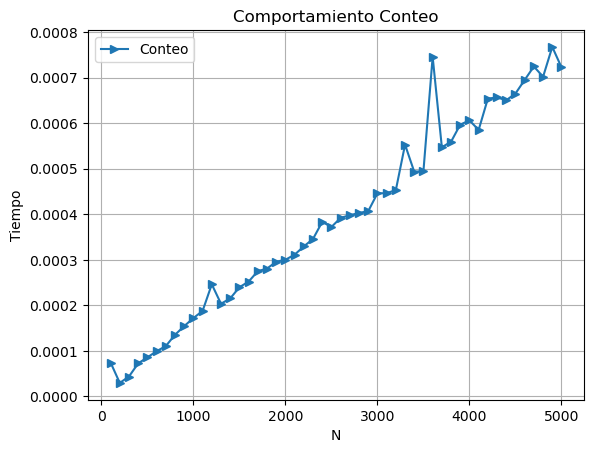

In [42]:
import matplotlib.pyplot as plt

# Grafico de burbuja
plt.plot(datos["N"], datos["Conteo"], label="Conteo", marker='>')
plt.title("Comportamiento Conteo")
plt.xlabel("N")
plt.ylabel("Tiempo")
plt.grid(True)
plt.legend()

plt.show()

## Grafico comportamiento del algoritmo Burbuja

Se puede verificar el comportamiento de una curva generada por una función cuadratica confirmando así su complejidad O(n<sup>2</sup>)

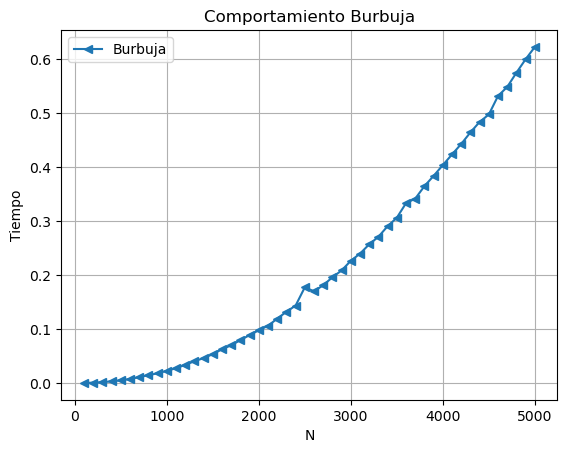

In [43]:
# Grafico de burbuja
plt.plot(datos["N"], datos["Burbuja"], label="Burbuja", marker='<')
plt.title("Comportamiento Burbuja")
plt.xlabel("N")
plt.ylabel("Tiempo")
plt.grid(True)
plt.legend()

plt.show()

## Grafico de comparación entre Conteo y Burbuja

La diferencia entre los tiempos logrados entre un algoritmo y el otro es muy grande, al graficarlos en la misma escala se puede verificar que la velocidad del algoritmo de Conteo es muy superior al del algoritmo Burbuja.

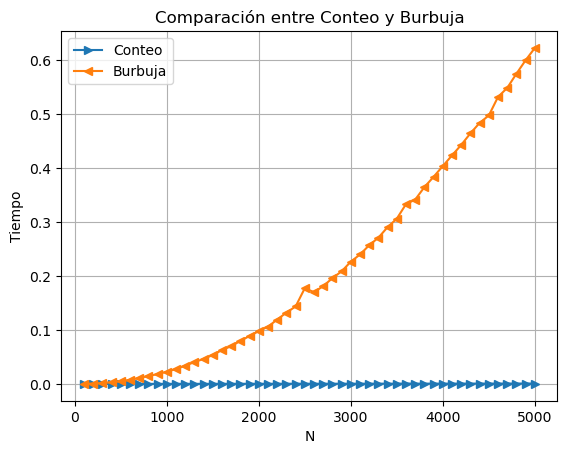

In [44]:
# Graficar
plt.plot(datos["N"], datos["Conteo"], label="Conteo", marker='>')
plt.plot(datos["N"], datos["Burbuja"], label="Burbuja", marker='<')

# Añadir títulos y etiquetas
plt.title("Comparación entre Conteo y Burbuja")
plt.xlabel("N")
plt.ylabel("Tiempo")
plt.grid(True)
plt.legend()

# Mostrar gráfico
plt.show()

## Conclusiones
- La principal ventaja es su complejidad lineal lo que permite utilizarlo para ordenar listas cuya llave es un valor entero.
- Como desventajas se tiene que para rangos de valores muy grandes se puede generar un consumo excesivo de memoria.
- El algoritmo es muy simple de implementar.

El presente documento con el análisis del algoritmo de ordenamiento por conteo fue preparado por **Luis Fernando Montenegro Urbano**.